Load .out file and show the Tb vs frequency plot

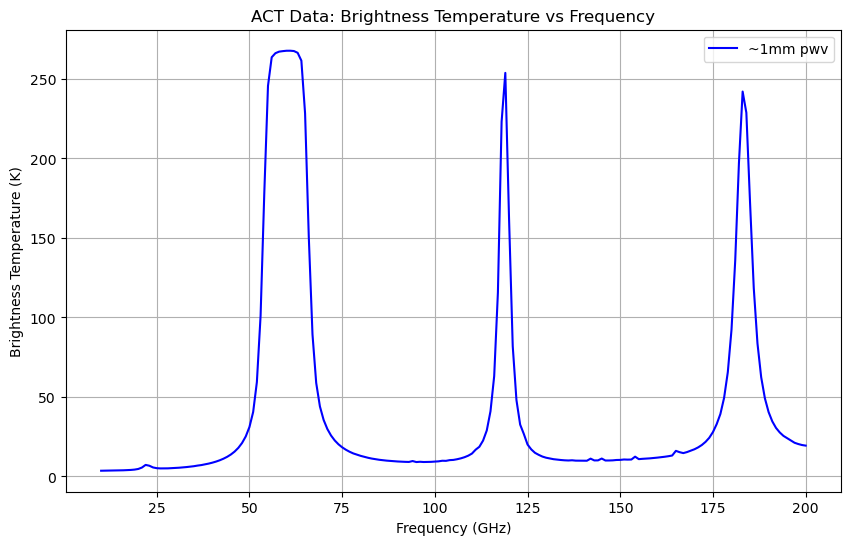

In [18]:
import os
import warnings
import subprocess
from io import BytesIO
from typing import Dict
from pathlib import Path
from datetime import datetime
from matplotlib.pylab import loadtxt
from packaging import version
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from astropy import units as u
from astropy import constants as c

output_data = np.loadtxt("ACT_DJF_5_1mm.txt")
#print("ACT_DJF_5_1mm.txt loaded")


fre = output_data[:, 0] * u.GHz
Tb = output_data[:, 4] * u.K

#plot the data
plt.figure(figsize=(10, 6))
plt.plot(fre, Tb, color='blue', label='~1mm pwv')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Brightness Temperature (K)')
plt.title('ACT Data: Brightness Temperature vs Frequency')
plt.grid()
plt.legend()


